In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
# print Dimesnions
print(f"Train Data: Number of Houses are: {train.shape[0]} and the number of features for each house are {train.shape[1]}")
print(f"Test Data: Number of Houses are: {test.shape[0]} and the number of features for each house are {test.shape[1]}")

Train Data: Number of Houses are: 891 and the number of features for each house are 12
Test Data: Number of Houses are: 418 and the number of features for each house are 11


In [4]:
 train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
177/891

0.19865319865319866

In [6]:
#drop column 'cabin' as more than 70% rows are null
train_1 = train.drop(['PassengerId','Cabin','Ticket','Name'], axis=1)
test_1 = test.drop(['PassengerId','Cabin','Ticket','Name'], axis=1)

In [7]:
# print Dimesnions
print(f"Train Data: Number of Houses are: {train_1.shape[0]} and the number of features for each house are {train_1.shape[1]}")
print(f"Test Data: Number of Houses are: {test_1.shape[0]} and the number of features for each house are {test_1.shape[1]}")

Train Data: Number of Houses are: 891 and the number of features for each house are 8
Test Data: Number of Houses are: 418 and the number of features for each house are 7


In [8]:
 train_1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
train_1['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
train_1['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [11]:
train_1['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [12]:
train_1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
# Plot the histogram
Sex_counts = train_1['Sex'].value_counts()


In [14]:
Sex_counts

Sex
male      577
female    314
Name: count, dtype: int64

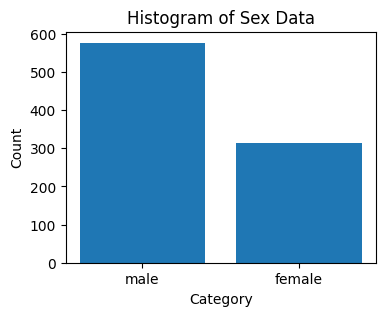

In [15]:
# Plotting
plt.figure(figsize=(4, 3))
plt.bar(Sex_counts.index, Sex_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Sex Data')
plt.show()

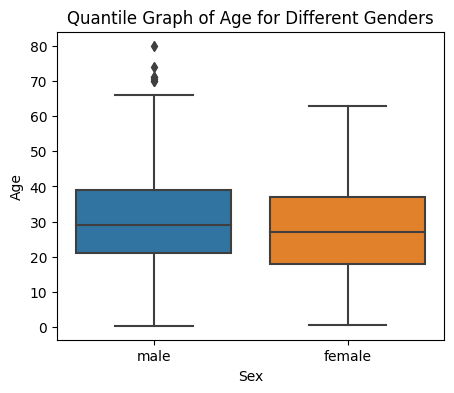

In [16]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='Sex', y='Age', data=train_1)
plt.title('Quantile Graph of Age for Different Genders')
plt.show()

In [17]:
 train_1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [18]:
train_1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
Replacement_nums ={
    "Sex": {"female": 1,"male": 0},
    "Embarked": {'S': 1, 'C':2, 'Q':3, 'nan' : 0},
}

In [20]:
train_2 = train_1.replace(Replacement_nums)
test_2 = test_1.replace(Replacement_nums)

In [21]:
train_2['Embarked'] = train_2['Embarked'].fillna(0)
test_2['Embarked'] = test_2['Embarked'].fillna(0)

In [22]:
train_2['Sex'].unique()

array([0, 1])

In [23]:
train_2['Embarked'].unique()

array([1., 2., 3., 0.])

In [24]:
train_2.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0


In [25]:
median_age_per_gender = train_1.groupby('Sex')['Age'].median()

In [26]:
train_2['Age'] = train_2['Age'].fillna(train_1['Sex'].map(median_age_per_gender))
test_2['Age'] = test_2['Age'].fillna(test_1['Sex'].map(median_age_per_gender))


In [27]:
median_age_per_gender

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [28]:
 train_2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
test_2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [30]:
train_2.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


In [31]:
def normalise_data(train_data, test_data):

    print("Normalising numerical columns between 0 and 1....")
    min_Age = train_data['Age'].min()
    max_Age = train_data['Age'].max()

    max_Fare = train_data['Fare'].max()
    min_Fare = train_data['Fare'].min()
    print(max_Fare, min_Fare)
    train_data['Age'] = (train_data['Age'] - min_Age)/(max_Age-min_Age)
    train_data['Fare'] = (train_data['Fare']  - min_Fare)/(max_Fare-min_Fare)

    test_data['Age'] = (test_data['Age'] - min_Age)/(max_Age-min_Age)
    test_data['Fare'] = (test_data['Fare']  - min_Fare)/(max_Fare-min_Fare)
    
    print("Done")
    return train_data, test_data


In [32]:
train_2, test_2 = normalise_data(train_2, test_2)

Normalising numerical columns between 0 and 1....
512.3292 0.0
Done


In [33]:
train_2.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,0.271174,1,0,0.014151,1.0
1,1,1,1,0.472229,1,0,0.139136,2.0
2,1,3,1,0.321438,0,0,0.015469,1.0
3,1,1,1,0.434531,1,0,0.103644,1.0
4,0,3,0,0.434531,0,0,0.015713,1.0
5,0,3,0,0.359135,0,0,0.016510,3.0
6,0,1,0,0.673285,0,0,0.101229,1.0
7,0,3,0,0.019854,3,1,0.041136,1.0
8,1,3,1,0.334004,0,2,0.021731,1.0
9,1,2,1,0.170646,1,0,0.058694,2.0


In [34]:
X = train_2.copy()
X = X.drop(columns=['Survived'])
Y = train_2['Survived']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [36]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
301,3,0,0.359135,2,0,0.045381,3.0
309,1,1,0.371701,0,0,0.111118,2.0
516,2,1,0.421965,0,0,0.020495,1.0
120,2,0,0.258608,2,0,0.143462,1.0
570,2,0,0.773813,0,0,0.020495,1.0
...,...,...,...,...,...,...,...
715,3,0,0.233476,0,0,0.014932,1.0
767,3,1,0.377984,0,0,0.015127,3.0
72,2,0,0.258608,0,0,0.143462,1.0
235,3,1,0.334004,0,0,0.014737,1.0


# Logistic Regression

In [37]:
log_regr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [38]:
log_regr.score(X_train, y_train)

0.8061797752808989

In [39]:
log_regr.score(X_test, y_test)

0.7932960893854749